<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_RForest_SelModels_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Random Forest & Seleção de Modelos & DESAFIO

Nesta aula você vai:

1. Aprender sobre mais um modelo de classificação muito empregado, as Florestas de Árvores Aleatórias
2. Recordar as métricas para a Seleção de Modelos
3. Além disso será desafiado a obter um melhor modelo de classificação com sua equipe

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Ensemble Models e Random Forests

*Ensemble models* são combinações de modelos. Eles são as mais eficazes
abordagens em aprendizado de máquina, geralmente alcançando melhor desempenho  que um único
modelo. Trazem um custo algorítmico alto, uma maior complexidade e muitas vezes dificultam a interpretabilidade dos modelos.
Existem duas motivações principais por trás da aprendizagem com *Ensemble models*: calcular a média das medidas pode fornecer uma
estimativa mais confiável e estável e, portanto, se pudermos construir um modelo de conjunto a partir dos mesmos dados de treinamento,
podemos reduzir o efeito de variações aleatórias em modelos únicos.

### Outros *ensemble* models

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Treinando uma Floresta Aleatória

Uma Floresta Aleatória consiste basicamente em empregarmos várias diferentes  Árvores de Decisão sobre os mesmos dados e obtermos a média dessas árvores para a predição. Na construção de um modelo de conjunto, *ensemble model*, em que todos modelos do conjunto são árvores de decisão é importante garantir que cada árvore individual não esteja muito correlacionada a qualquer uma das outras árvores no modelo. Para garantir isso a construção de florestas aleatórias baseia-se em dois princípios: a *agregação bootstrap*, ou *bagging*; e a seleção aleatória de atributos.



### Bagging, *Bootstrap Aggregation*

As árvores de decisão são muito sensíveis aos dados de treinamento com pequenas mudanças dos dados resultando em árvores significativamente diferentes. A floresta aleatória tira vantagem disso, permitindo que cada árvore individual faça uma amostra aleatória do conjunto de dados com substituição, resultando em árvores bastante diferentes. Este processo é conhecido como *bagging*.
Note que não estamos subdividindo os dados de treinamento em partes menores e treinando cada árvore em uma parte diferente. O número de amostras de treinamento em cada árvore será o mesmo, mas em vez de empregarem os dados de  treinamento originais, cada árvore emprega uma amostra aleatória do mesmo tamanho $n$ dos dados originais com substituição. No exemplo abaixo, para os dados $[1, 2, 3, 4, 5, 6]$ originais são empregadas as amostras $[1,2,3,3,6,6]$,
$[1,2,3,4,5,5]$ e $[2,2,3,4,5,6]$, no que se assemelha muito ao CV, embora seja diferente.

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/randomforest2.png?raw=true)


<small>
<b>
Figura 7. Esquema de Funcionamento de Random Forests.

### Seleção Aleatória de Atributos

Como você viu na construção de uma árvore de decisão normal escolhemos a cada nível os atributos que produzem a maior separação entre as amostras. Se adotássemos isso em uma Floresta de Árvores, certamente iríamos obter Árvores bastante correlacionadas. Uma Floresta Aleatória se utiliza do fato de que podemos empregar outros atributos e outra ordem dos atributos para construir a árvore, assim cada árvore em uma floresta aleatória escolhe atributos apenas de um subconjunto aleatório o que permite uma maior variação entre as árvores no modelo de conjunto.




## Predição Final

A final, a predição do modelo é obtida como uma média do resultado de cada árvore do conjunto (modelos de regressão) ou o *majority-voting* (classificação).

# Um exemplo clássico

Antes de prosseguir talvez você queira revisar aqui alguns pontos de como empregar o classificador `DecisionTreeClassifier` no exemplo clássico de Mitchell, Tom Michael (1997). Machine Learning.

In [14]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/ML/PlayBallcsv.csv')
df.head()

,Day,Outlook,Temperature,Humidity,Wind,Play ball
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


Primeiramente você precisa fazer o encode dos dados, uma restrição da implementação do `scikit-learn`.

In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_labels = df.drop(columns=['Day','Play ball']).apply(LabelEncoder().fit_transform)

pd.concat([ df_labels, df[['Play ball']] ], axis=1).head()

,Outlook,Temperature,Humidity,Wind,Play ball
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes


O uso do estimador segue do mesmo modo que já empregamos para o estimador logístico, o Knn e é a forma de empregarmos qualquer modelo de aprendizado supervisinado.

In [16]:
from sklearn.tree import DecisionTreeClassifier

X = df_labels
y = df['Play ball']

clf = DecisionTreeClassifier()

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )


1.0


Você pode achar útil visualizar a árvore de decisão criada  com o `graphviz`.

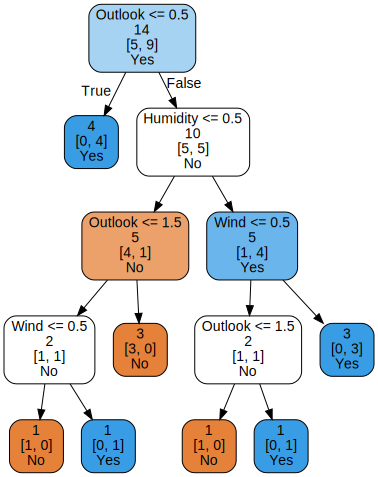

In [17]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=list(df_labels.columns.values),
                     class_names=list(sorted(df['Play ball'].unique())),
                     filled=True, rounded=True,
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)
graph = graphviz.Source(dot_data)
graph.render('graph_cartoons') # para gravação em .pdf
graph

E a informação mútua e o peso dos atributos no classificador fornecem informações úteis para análises dos modelos em muitos casos.

In [18]:
from sklearn.feature_selection import mutual_info_classif

print(X.columns)
print(mutual_info_classif(X, y, discrete_features=True))
print(clf.feature_importances_)

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')
[0.17103394 0.02025554 0.10524435 0.03335912]
[0.47111111 0.         0.28       0.24888889]


In [19]:
from sklearn.ensemble import RandomForestClassifier

X = df_labels
y = df['Play ball']

clf = RandomForestClassifier()

clf.fit(X,y)
y_pred = clf.predict(X)
print( clf.score(X,y) )

1.0


# Selecionando Diferentes Modelos

Diferentes modelos criam fronteiras de decisão diferentes para os mesmos conjuntos de dados. Eles empregam critérios diferentes e, por isso, produzem classificações de modo diferente o que torna difícil você escolher empregar um modelo ou outro, muitas vezes, essa é a parte mais difícil de resolver um problema de aprendizado de máquina: *qual o estimador certo para empregar?* Não há um melhor estimador *apriori* para quaisquer dados e estimadores diferentes são mais adequados para diferentes tipos de dados e problemas. O `scikit-learn` fornece em https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html um diagrama, e que fornecemos abaixo, que funciona como um guia, embora aproximado, de como abordar problemas com relação a quais estimadores empregar.

![imagem](https://scikit-learn.org/stable/_static/ml_map.png)

<small>
<b>
Figura 8. Diagrama do scikit-learn para seleção de modelos. <br></b>(Fonte: https://scikit-learn.org/)








De qualquer modo uma abordagem comum e que você encontra em sistemas de *Auto ML*, consiste em adotarmos alguma métrica, como a acuracidade ou a precisão, para selecionar diferentes modelos, experimentando cada um deles, muito à exemplo do que fizemos na trilha anterior para a escolha dos melhores hiperparâmetros.

Vamos adaptar então o código modelo final da trilha anterior para explorar agora, não só diferentes hiperparâmetros, mas diferentes estimadores. Afinal você já estudou aqui ao menos 4 estimadores para classificação e está na hora de você buscar escolher o melhor modelo dentre esses classificadores para um conjunto de dados de sua escolha. Vamos adionar ainda um quinto modelo, que você ainda não estudou, para que você entenda que você já pode explorar quaisquer modelos de classificação com o que aprendeu aqui.

Abaixo os principais classificadores do `scikit-learn` e os que empregaremos, com (*), para seleção de um estimador para o nosso conjunto de dados *moons*:       

```
from sklearn.linear_model import LogisticRegression # (*)
from sklearn.neighbors import KNeighborsClassifier # (*)
from sklearn.tree import DecisionTreeClassifier # (*)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier # (*)
```



In [20]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None,prefix='Vote_')
df.rename(columns={'Vote_0':'class'},inplace=True)
df.head()

<ipython-input-20-7274ab72e254>:1: FutureWarning: The prefix argument has been deprecated and will be removed in a future version. Use a list comprehension on the column names in the future.


  df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None,prefix='Vote_')


,class,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [21]:
df.shape

(435, 17)

## Preparação dos Dados

Não existem dados ausentes, mas as abstenções '?' são um grande número de casos. Vamos esperar que elas possam também ajudar a identificar o partido do congressista uma vez que isso parece ser mais uma informação importante do que exatamente ausência de informação.

In [22]:
df.isnull().sum().sum()

0

In [23]:
(df == '?').sum()

class        0
Vote_1      12
Vote_2      48
Vote_3      11
Vote_4      11
Vote_5      15
Vote_6      11
Vote_7      14
Vote_8      15
Vote_9      22
Vote_10      7
Vote_11     21
Vote_12     31
Vote_13     25
Vote_14     17
Vote_15     28
Vote_16    104
dtype: int64

Agora precisamos fazer o encode dos dados. A rigor deveríamos fazer o hot encode, mas por simplicidade será suficiente aqui fazermos apenas o label encode do dados.

In [24]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_labels = df.drop(columns=['class']).apply(LabelEncoder().fit_transform)

pd.concat([ df_labels, df[['class']] ], axis=1).head()

,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16,class
0,1,2,1,2,2,2,1,1,1,2,0,2,2,2,1,2,republican
1,1,2,1,2,2,2,1,1,1,1,1,2,2,2,1,0,republican
2,0,2,2,0,2,2,1,1,1,1,2,1,2,2,1,1,democrat
3,1,2,2,1,0,2,1,1,1,1,2,1,2,1,1,2,democrat
4,2,2,2,1,2,2,1,1,1,1,2,0,2,2,2,2,democrat


Antes de testarmos diferentes classificadores vamos aplicar um modelo básico para verificar o formato dos dados para aplicação do modelo.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report

X = df_labels
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))



Score de Acuracidade (2):

0.93

Classification Report:

              precision    recall  f1-score   support

    democrat       0.93      0.96      0.94        80
  republican       0.94      0.88      0.91        51

    accuracy                           0.93       131
   macro avg       0.93      0.92      0.93       131
weighted avg       0.93      0.93      0.93       131



Parece tudo certo e podemos ainda verificar a árvore produzida neste treinamento.

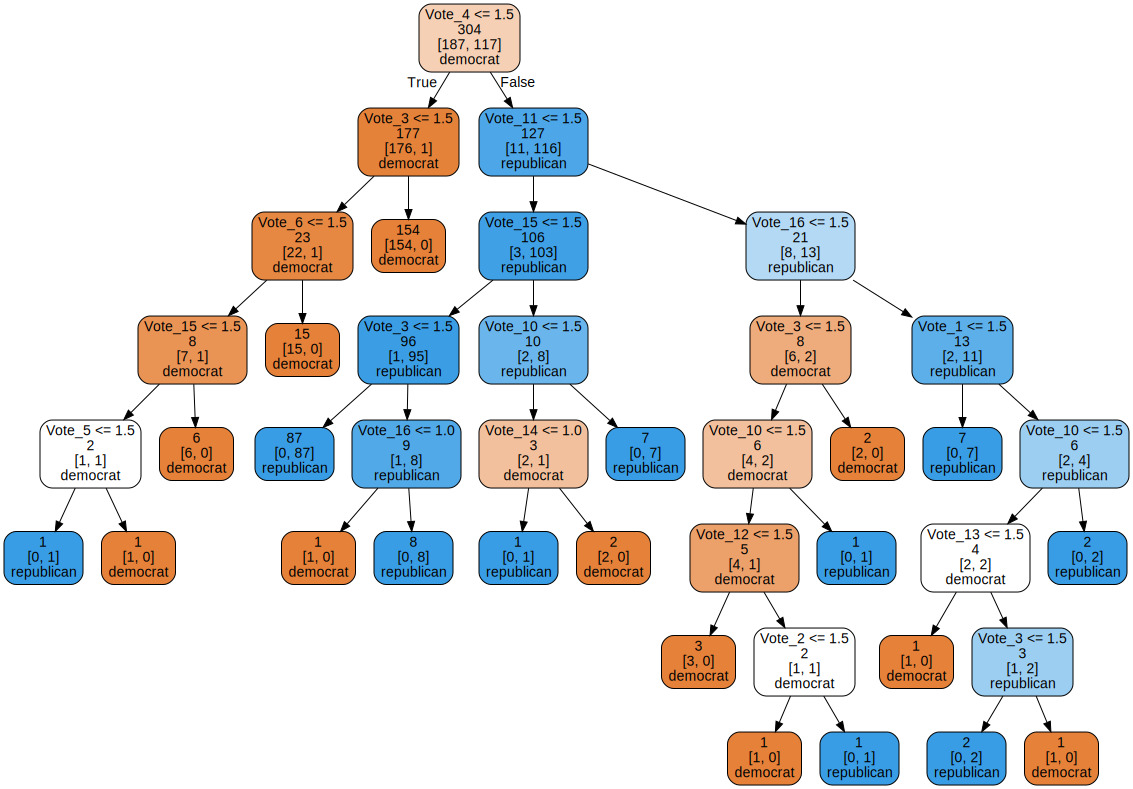

In [26]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=list(df_labels.columns.values),
                     class_names=list(sorted(df['class'].unique())),
                     filled=True, rounded=True,
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)
graph = graphviz.Source(dot_data)
graph.render('graph_democratic') # para gravação em .pdf
graph

e os valores de informações mútua e importância dos atributos mostram a concordância dos principais atributos que encabeçam a Árvore.

In [27]:
print('Mutual information and the attribute with higher Mutual Info: \n')
print(mutual_info_classif(X, y, discrete_features=True))
print(X.columns[ mutual_info_classif(X, y, discrete_features=True).argmax() ])
print()
print('Feature Importances and the attribute with higher Feature Importances: \n')
print(clf.feature_importances_)
print(X.columns[ clf.feature_importances_.argmax() ])

Mutual information and the attribute with higher Mutual Info: 

[8.73872293e-02 2.49962316e-04 2.99660509e-01 5.12951549e-01
 2.92820364e-01 1.02055280e-01 1.37023508e-01 2.35826473e-01
 2.15261646e-01 3.52248115e-03 7.43690939e-02 2.59411124e-01
 1.57899640e-01 2.32400929e-01 1.52771138e-01 7.06865546e-02]
Vote_4

Feature Importances and the attribute with higher Feature Importances: 

[0.00498781 0.0069473  0.01350356 0.84658144 0.0069473  0.00113271
 0.         0.         0.         0.02501028 0.03028702 0.00416838
 0.00463153 0.00926307 0.00973332 0.03680628]
Vote_4


In [28]:
X.columns[ np.argsort(- mutual_info_classif(X, y, discrete_features=True))[0:5] ]

Index(['Vote_4', 'Vote_3', 'Vote_5', 'Vote_12', 'Vote_8'], dtype='object')

In [29]:
X.columns[ np.argsort(- clf.feature_importances_)[0:5] ]

Index(['Vote_4', 'Vote_16', 'Vote_11', 'Vote_10', 'Vote_3'], dtype='object')

# Comparando os Modelos

Vamos agora comparar os modelos que você já conhece de classificação e o modelo de Árvore de Decisão.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimators = [ LogisticRegression(),
                    neighbors.KNeighborsClassifier(5),
                    DecisionTreeClassifier(),
                    DecisionTreeClassifier(max_depth=2) ]

best_score = 0

for estimator in base_estimators:
  clf = estimator
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print(clf)

  accuracy = clf.score(X_test, y_test)
  print('\nScore de Acuracidade (2):\n')
  print(f'{accuracy:.2f}')

  if accuracy > best_score:
    best_score = accuracy
    best_model = clf

  print('\nClassification Report:\n')
  print(classification_report(y_test, y_pred))


print('\n Best Model: ' , best_model, ' score = ', best_score)





LogisticRegression()

Score de Acuracidade (2):

0.94

Classification Report:

              precision    recall  f1-score   support

    democrat       0.93      0.97      0.95        80
  republican       0.96      0.88      0.92        51

    accuracy                           0.94       131
   macro avg       0.94      0.93      0.93       131
weighted avg       0.94      0.94      0.94       131

KNeighborsClassifier()

Score de Acuracidade (2):

0.92

Classification Report:

              precision    recall  f1-score   support

    democrat       0.94      0.94      0.94        80
  republican       0.90      0.90      0.90        51

    accuracy                           0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131

DecisionTreeClassifier()

Score de Acuracidade (2):

0.91

Classification Report:

              precision    recall  f1-score   support

    democrat       0.90      0.96      0.93     

Com os parâmetros acima o melhor estimador, levando em consideração apenas o critério de acuracidade (*score*), foi a Árvore de Decisão com o critério `gini` de seleção dos atributos (é o padrão) e com uma profundidade máxima de 2 da Árvore.

> *Poda: A técnica de reduzir a profundidade da Árvore de Decisão é chamada de Poda e permite reduzir o overfitting (sobreajuste) dos modelos, um problema geralmente encontrado em Árvores de Decisão*.





O melhor modelo produz então a seguinte Árvore de Decisão.

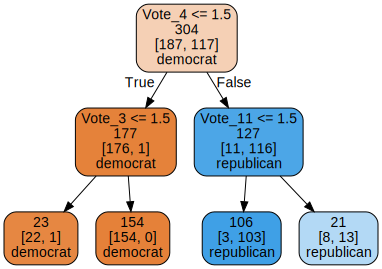

In [31]:
clf = best_model

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=list(df_labels.columns.values),
                     class_names=list(sorted(df['class'].unique())),
                     filled=True, rounded=True,
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)
graph = graphviz.Source(dot_data)
graph.render('graph_democratic') # para gravação em .pdf
graph

Você pode acessar a documentação dos dados (http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names) e verificar a que eleições se referem os votos acima:

* Vote_4: physician-fee-freeze
* Vote_3: adoption-of-the-budget-resolution
* Vote_11: synfuels-corporation-cutback

E, de fato, seria suficiente ainda somente a informação do Vote_4: physician-fee-freeze para classificar os congressistas. Em 1984, o governo federal impõe um congelamento de um ano nos pagamentos para os serviços de saúde, sendo os serviços de saúde  um tema polêmico que ainda hoje divide republicamos e democratas.


# Selecionando outros Modelos

> *Você pode adaptar o código de seleção de modelos acima para explorar, por exemplo, diferentes valores de $k$ para o K-vizinhos mais Próximos ou ainda diferentes profundidades da Árvore. Para isso basta implementar no código original um procedimento mais ou menos como abaixo:*

In [33]:
%%script false --no-raise-error

for k in range(2,10):
  clf = neighbors.KNeighborsClassifier(k)
  ...

# OU

for deep in range(2,10):
  clf = DecisionTreeClassifier(max_depth=deep)
  ...

Nas próximas aulas você aprenderá como fazer isso com uma função do Scikit-learn.

# Exercício **Mini-desafio**

Mini-desafio em grupo. Empregando os recursos e algoritmos conhecidos até aqui (caso queira empregar um recurso não visto em sala, verifique antes com o professor) cada equipe deve buscar chegar no melhor resultado da acuracidade determinação do Alto Risco de Pacientes.

Após a construção dos modelos os modelos serão testados em dois novos conjuntos de dados.

* [0 25 50 75 **100**] Melhores resultados nos 2 dois novos conjuntos de dados, $10.0$
* [0 25 50 **75** **99**] Melhores resultados nos 2 dois novos conjuntos de dados, $9.0$
* [0 25 **50** **74** 100] Melhores resultados nos 2 dois novos conjuntos de dados, $7.0$
* [**0 25 49** 75 100] Melhores resultados nos 2 dois novos conjuntos de dados, $6.0$



In [72]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/blood_risk.csv')
df.head()

,record,name,cpf,address,birthday,Gluconise,H2B4,H356,HB_A56,Adrino_posina,...,H278,Positron_L,Plate,Factor_risk,norm_gamma_type,Blood_type,Blood_Rh,Low_Risk,Medium_Risk,High_Risk
0,89256,Bryan Cardoso,83619570221,"Vereda Sabrina Oliveira, 14\nDelta\n59803556 S...",2006-11-14,916.6484,79.16,229.16,37.50,Uncovered,...,5749.42,28.2269,DD,5,1,AB,+,True,False,False
1,72173,Sr. Vicente Lima,30861597230,"Largo de Fogaça, 800\nGameleira\n24540-170 Mar...",2013-11-22,988.7466,97.19,247.19,37.50,Clinical Done,...,285.18,22.7627,NaN,2,1,O,+,True,False,False
2,95816,Otávio da Rosa,89532614737,"Jardim Vieira, 809\nGameleira\n33533246 Teixei...",2008-10-23,572.7608,-6.81,143.19,37.50,Uncovered,...,8000.08,30.4776,X,5,1,O,-,True,False,False
3,44566,Alícia da Cruz,53027691406,"Largo Juliana Cunha, 83\nFlavio Marques Lisboa...",2011-07-25,1328.0542,182.01,332.01,90.83,Clinical Done,...,5737.50,28.2150,DD,5,1,AB,-,False,True,True
4,31019,Maysa Novaes,53817096259,"Setor Nunes, 56\nConjunto Taquaril\n93444-430 ...",2021-06-25,641.3129,10.33,160.33,90.83,Clinical Done,...,5476.12,27.9536,B,5,1,NaN,+,False,True,True
